In [7]:
#import libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
import os

In [8]:
obesity_train_raw = pd.read_csv('../data/obesity_train.csv')
obesity_test_raw = pd.read_csv('../data/obesity_test.csv')


# Usa display per mostrare il DataFrame intero senza troncamenti
display(train_data)

train_data.obese_level.value_counts()

,id,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,marrital_status,meals_perday,...,parent_overweight,physical_activity_perweek,region,siblings,smoke,transportation,veggies_freq,water_daily,weight,obese_level
0,1,21.0,Never,no,up to 5,Sometimes,Female,1.62,NaN,3.0,...,yes,NaN,LatAm,3.0,no,Public,Sometimes,1 to 2,64.0,Normal_Weight
1,2,23.0,Frequently,no,up to 5,Sometimes,Male,1.80,NaN,3.0,...,yes,3 to 4,LatAm,0.0,no,Public,Sometimes,1 to 2,77.0,Normal_Weight
2,3,NaN,Frequently,no,up to 2,Sometimes,Male,1.80,NaN,3.0,...,no,3 to 4,LatAm,2.0,no,Walk,Always,1 to 2,87.0,Overweight_Level_I
3,4,22.0,Sometimes,no,up to 2,Sometimes,Male,1.78,NaN,1.0,...,no,NaN,LatAm,3.0,no,Public,Sometimes,1 to 2,90.0,Overweight_Level_II
4,5,22.0,Sometimes,no,up to 2,Sometimes,Male,1.64,NaN,3.0,...,no,5 or more,LatAm,3.0,no,Public,Sometimes,1 to 2,53.0,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606,1607,21.0,Sometimes,NaN,up to 5,Sometimes,Female,1.73,NaN,3.0,...,yes,3 to 4,LatAm,1.0,no,Public,Always,1 to 2,131.0,Obesity_Type_III
1607,1608,22.0,Sometimes,yes,up to 5,Sometimes,Female,1.75,NaN,3.0,...,yes,1 to 2,LatAm,0.0,no,NaN,Always,1 to 2,134.0,Obesity_Type_III
1608,1609,23.0,Sometimes,yes,up to 5,Sometimes,Female,1.75,NaN,3.0,...,yes,1 to 2,LatAm,0.0,no,Public,Always,1 to 2,134.0,Obesity_Type_III
1609,1610,24.0,Sometimes,yes,up to 5,Sometimes,Female,1.74,NaN,3.0,...,yes,1 to 2,LatAm,0.0,no,Public,Always,more than 2,133.0,Obesity_Type_III


obese_level
Obesity_Type_I         269
Obesity_Type_III       240
Obesity_Type_II        232
Overweight_Level_II    226
Overweight_Level_I     225
Normal_Weight          222
Insufficient_Weight    197
Name: count, dtype: int64

In [9]:
# Display information about the training dataset
obesity_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1611 non-null   int64  
 1   age                        1545 non-null   float64
 2   alcohol_freq               1575 non-null   object 
 3   caloric_freq               1591 non-null   object 
 4   devices_perday             1589 non-null   object 
 5   eat_between_meals          1552 non-null   object 
 6   gender                     1591 non-null   object 
 7   height                     1597 non-null   float64
 8   marrital_status            0 non-null      float64
 9   meals_perday               1602 non-null   float64
 10  monitor_calories           1572 non-null   object 
 11  parent_overweight          1591 non-null   object 
 12  physical_activity_perweek  1046 non-null   object 
 13  region                     1544 non-null   objec

In [10]:
# Descriptive statistics for numerical variables
numerical_columns = ['age', 'height', 'weight', 'meals_perday', 'siblings']
print("Descriptive statistics for numerical variables:")
print(obesity_train_raw[numerical_columns].describe())

Descriptive statistics for numerical variables:
               age       height       weight  meals_perday     siblings
count  1545.000000  1597.000000  1558.000000   1602.000000  1599.000000
mean     24.344984     1.704108    86.956354      2.684145     1.500938
std       6.474498     0.095567    26.072339      0.817584     1.132562
min       6.000000     1.290000    32.000000      1.000000     0.000000
25%      20.000000     1.630000    67.000000      3.000000     0.000000
50%      23.000000     1.700000    83.000000      3.000000     2.000000
75%      26.000000     1.770000   107.000000      3.000000     3.000000
max      88.000000     2.190000   193.000000      4.000000     3.000000


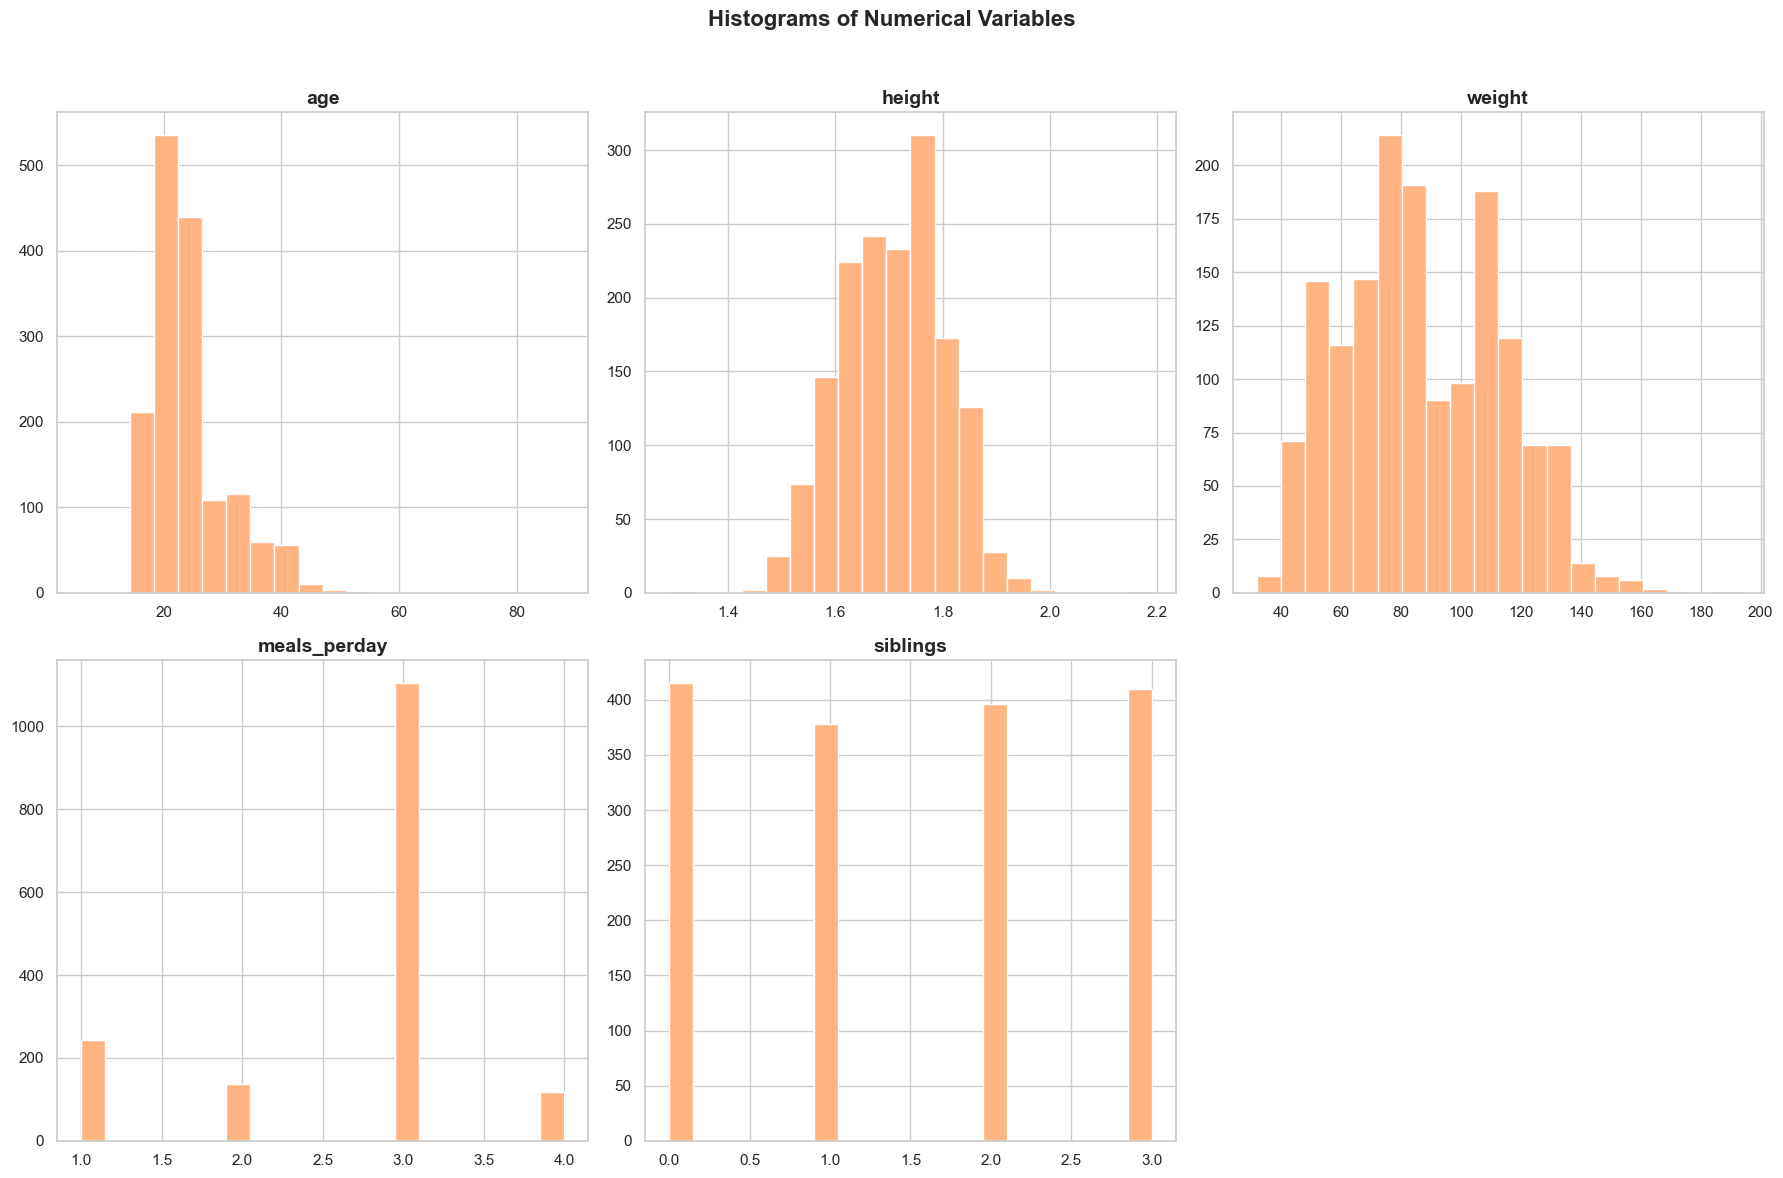

In [11]:
# Set aesthetic plot styles and color palette
sns.set_theme(style="whitegrid")
palette = sns.color_palette("pastel")

# Create subplots for histograms of numerical variables
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle("Histograms of Numerical Variables", fontsize=16, fontweight='bold')

for i, column in enumerate(numerical_columns):
    row, col = divmod(i, 3)
    obesity_train_raw[column].hist(bins=20, ax=axes[row, col], color=palette[1])
    axes[row, col].set_title(column, fontsize=14, fontweight='bold')

# Remove empty subplot if the number of numerical columns is less than the grid size
if len(numerical_columns) < 6:
    fig.delaxes(axes[1, 2])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

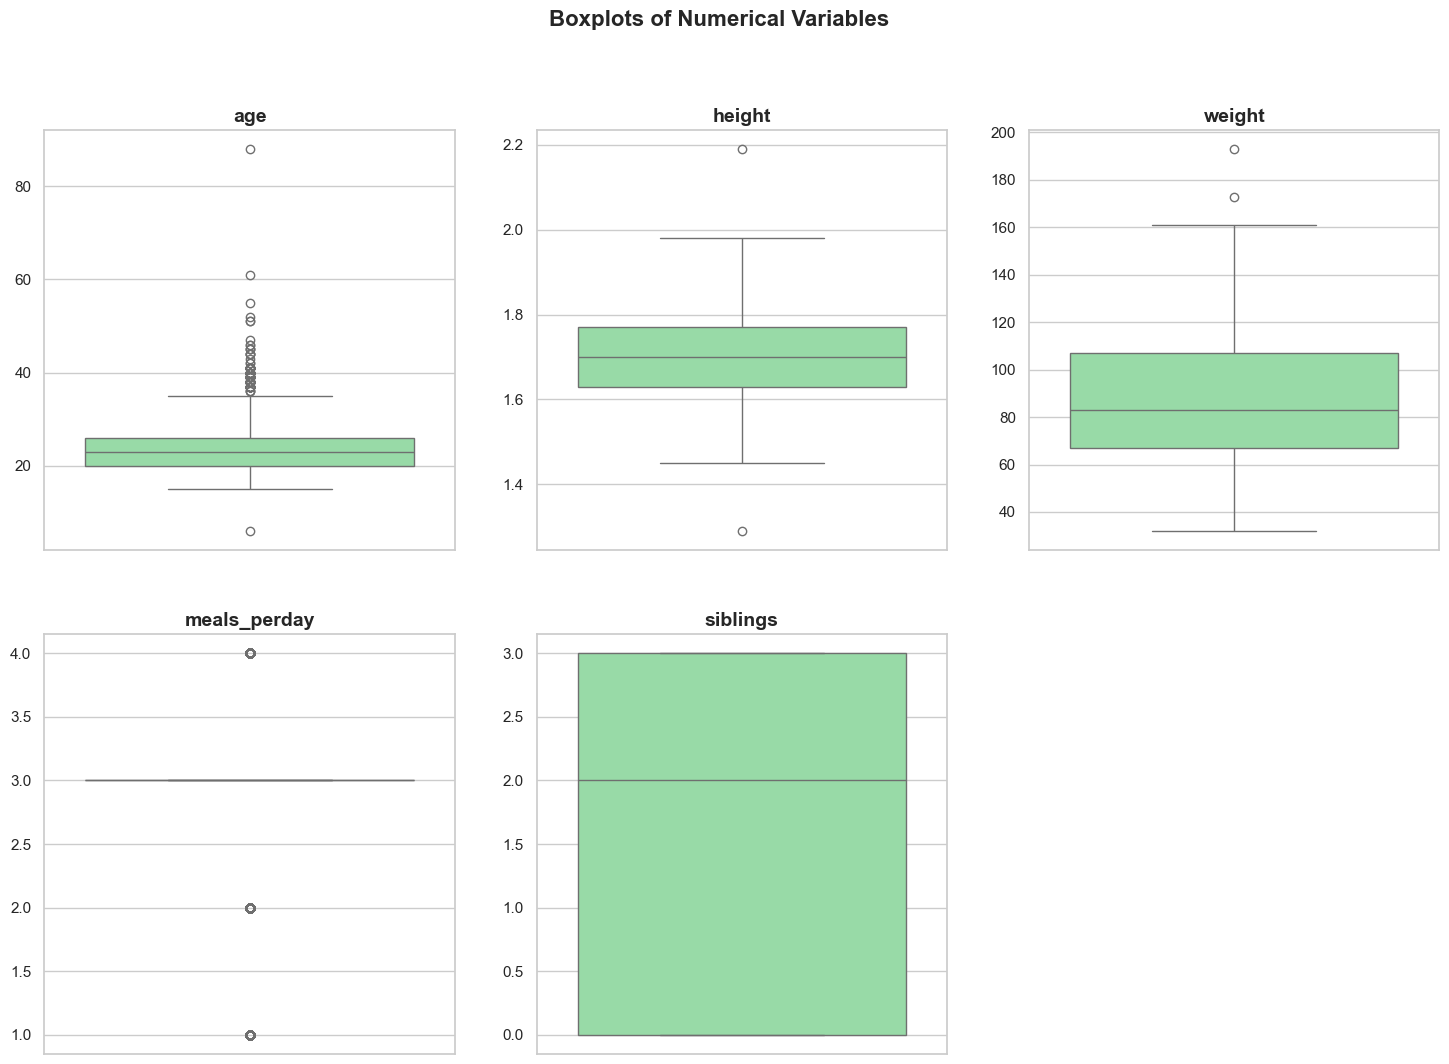

In [12]:
# Separate boxplots for each numerical variable with customization on a single canvas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle("Boxplots of Numerical Variables", fontsize=16, fontweight='bold')

for i, column in enumerate(numerical_columns):
    row, col = divmod(i, 3)
    sns.boxplot(data=obesity_train_raw, y=column, color=palette[2], ax=axes[row, col])
    axes[row, col].set_title(column, fontsize=14, fontweight='bold')
    axes[row, col].set_ylabel(None)

# Remove empty subplot if the number of numerical columns is less than the grid size
if len(numerical_columns) < 6:
    fig.delaxes(axes[1, 2])

plt.show()


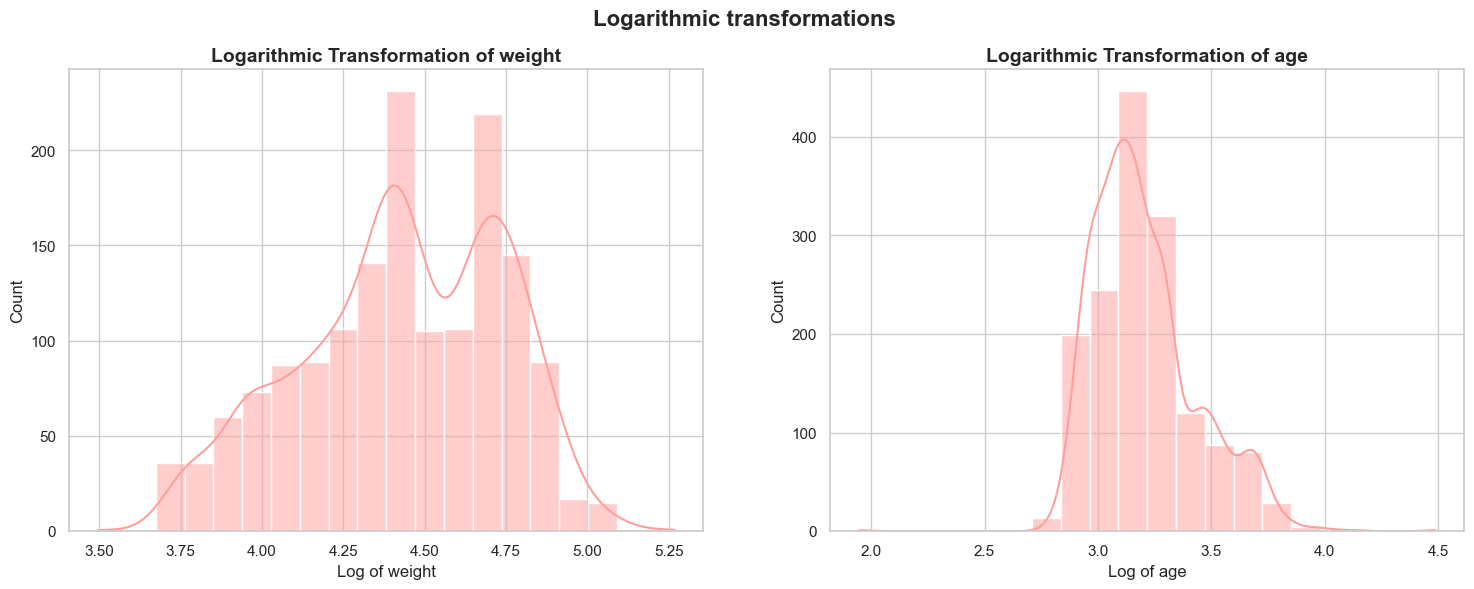

In [13]:
# Logarithmic transformation for weight and age variables

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle("Logarithmic transformations", fontsize=16, fontweight='bold')

log_transform_columns = ['weight', 'age']  # Example variables to transform

for i, column in enumerate(log_transform_columns):
    sns.histplot(np.log1p(obesity_train_raw[column]), bins=20, kde=True, color=palette[3], ax=axes[i])
    axes[i].set_title(f'Logarithmic Transformation of {column}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(f'Log of {column}', fontsize=12)

plt.show()

In [14]:
obesity_train_raw['physical_activity_perweek'] = obesity_train_raw['physical_activity_perweek'].fillna('0')

C:\Users\User\AppData\Local\Temp\ipykernel_9504\3641171163.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=obesity_train_raw, palette="pastel", ax=ax)
C:\Users\User\AppData\Local\Temp\ipykernel_9504\3641171163.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=obesity_train_raw, palette="pastel", ax=ax)
C:\Users\User\AppData\Local\Temp\ipykernel_9504\3641171163.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=obesity_train_raw, palette="pastel", ax=ax)
C:\Users\User\AppData\Local\Temp\ipykern

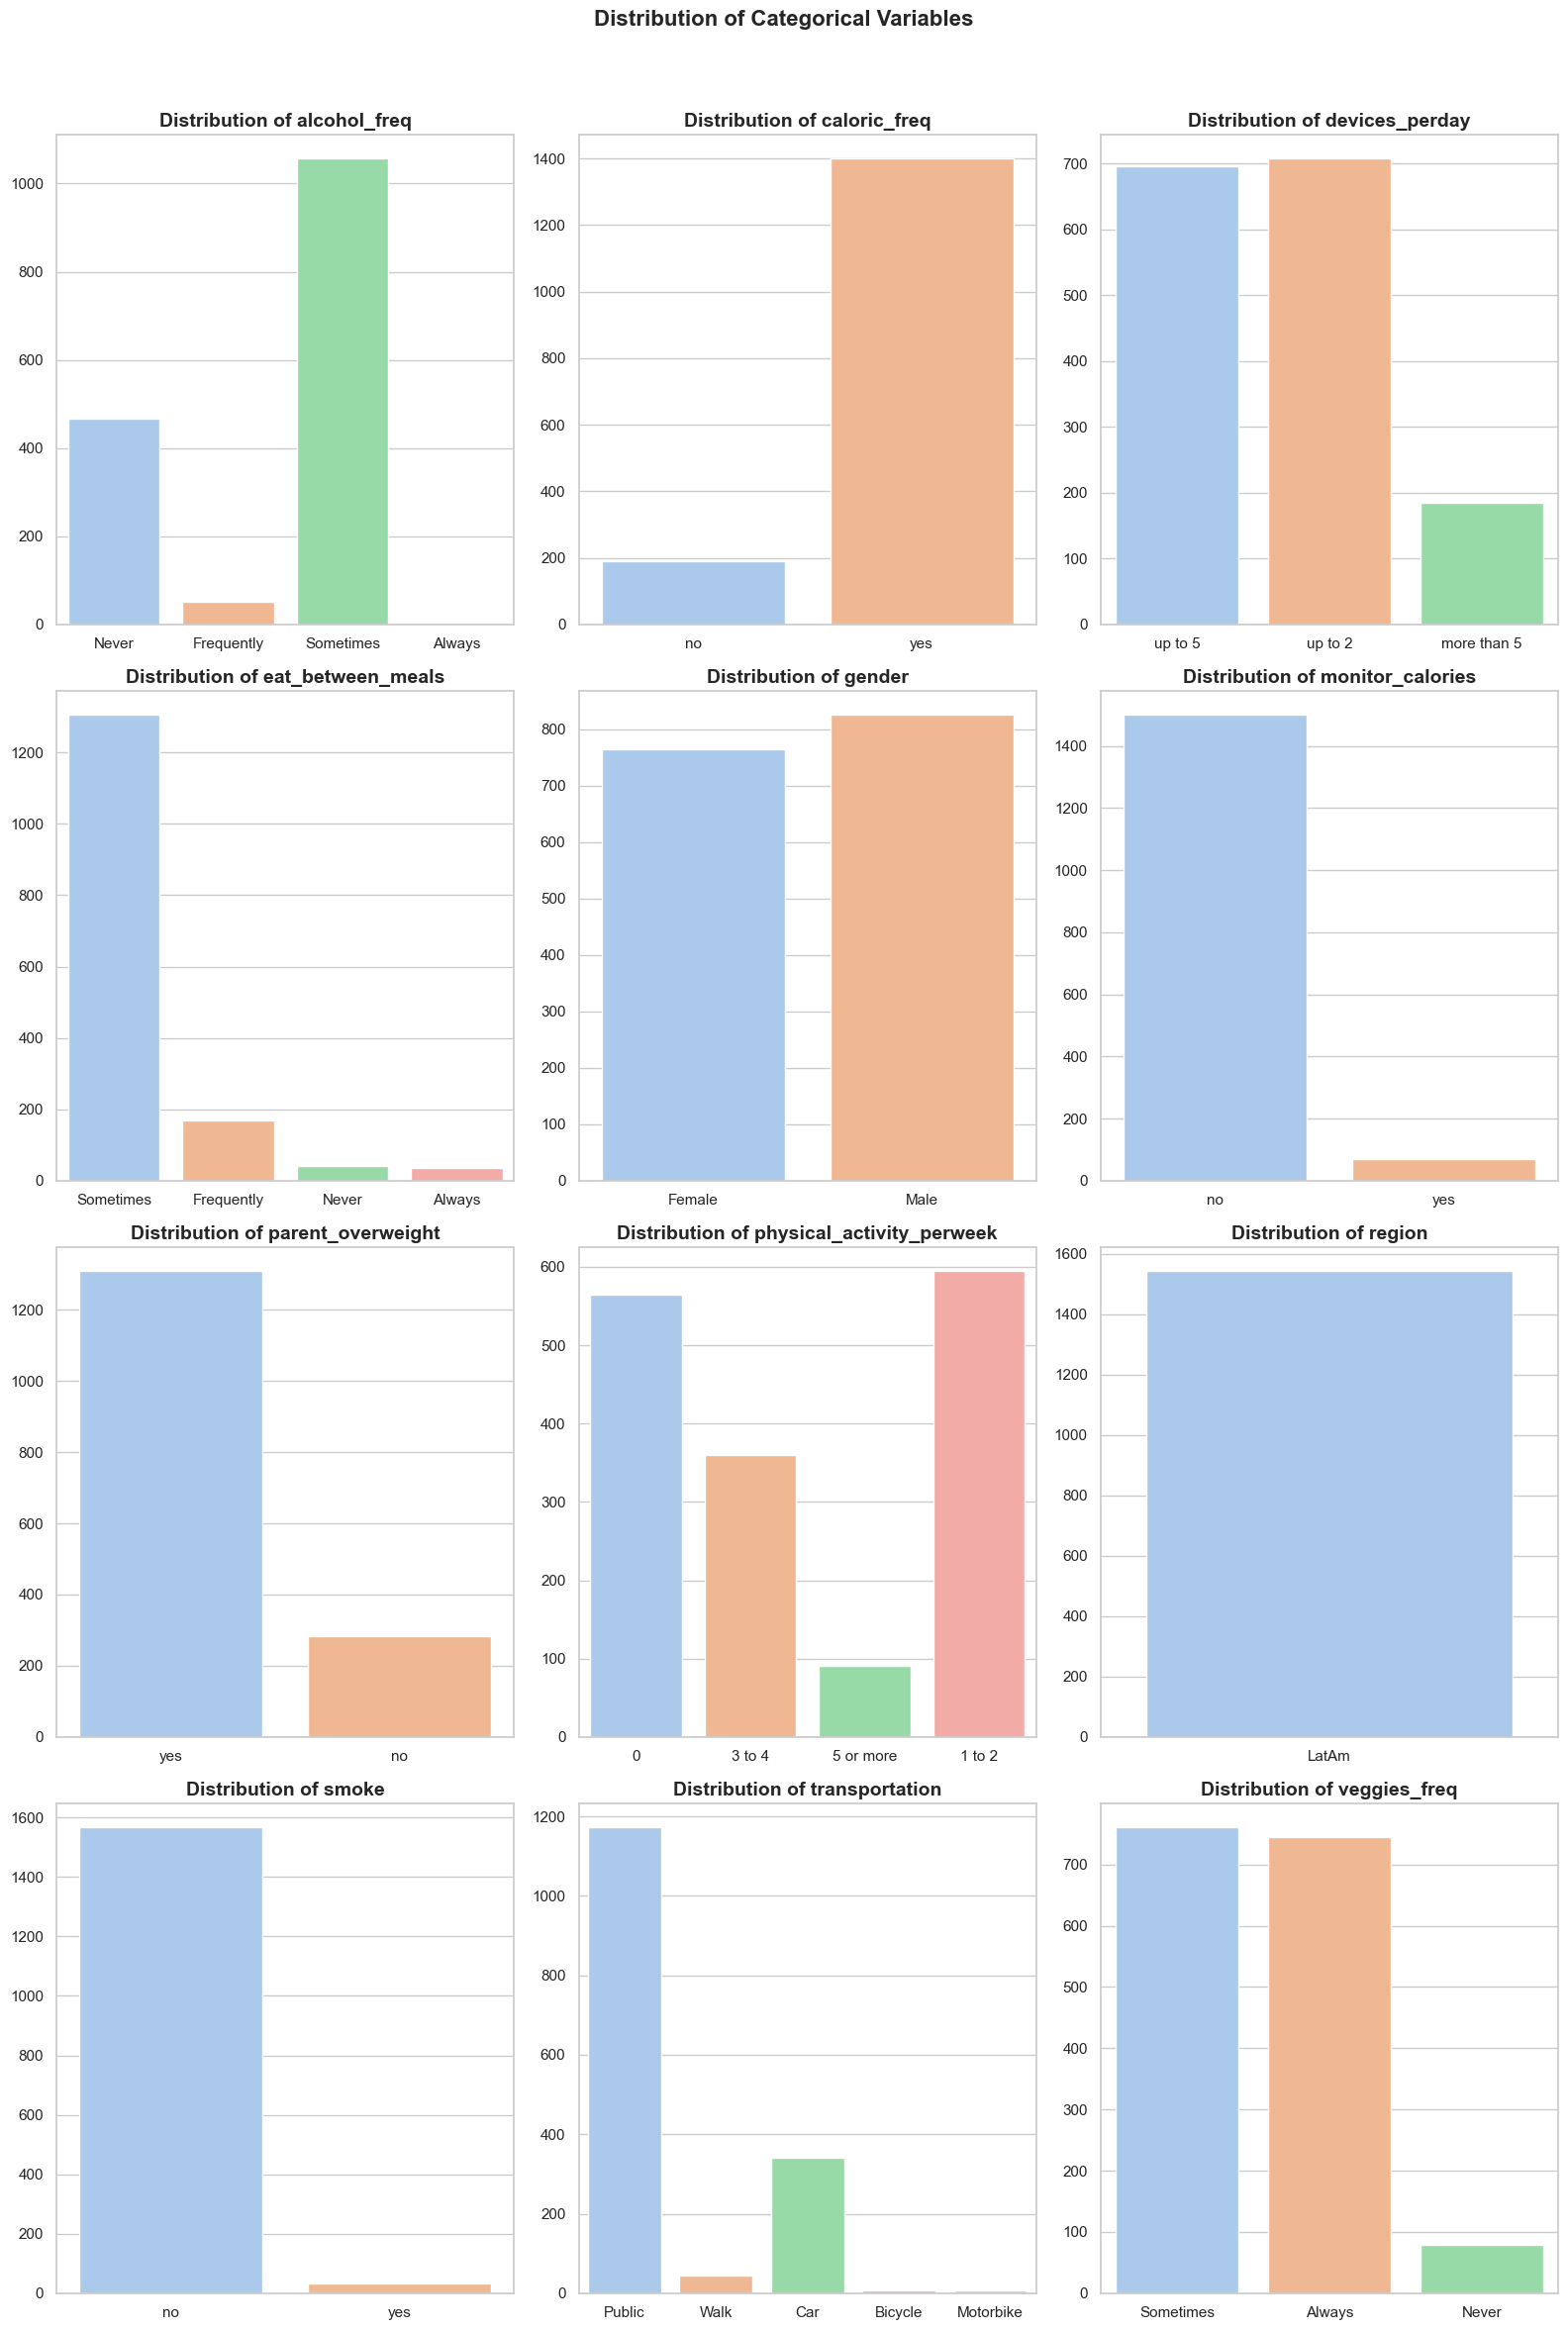

In [15]:
# Ordered countplots for categorical variables

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 24))
fig.suptitle('Distribution of Categorical Variables', fontsize=16, fontweight='bold')

for ax, var in zip(axes.flatten(), obesity_train_raw.select_dtypes(include='object').columns):
    sns.countplot(x=var, data=obesity_train_raw, palette="pastel", ax=ax)
    ax.set_title(f'Distribution of {var}', fontsize=14, fontweight='bold')
    ax.set_xlabel(None)
    ax.set_ylabel(None)

# Remove any empty subplots
for i in range(len(obesity_train_raw.select_dtypes(include='object').columns), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


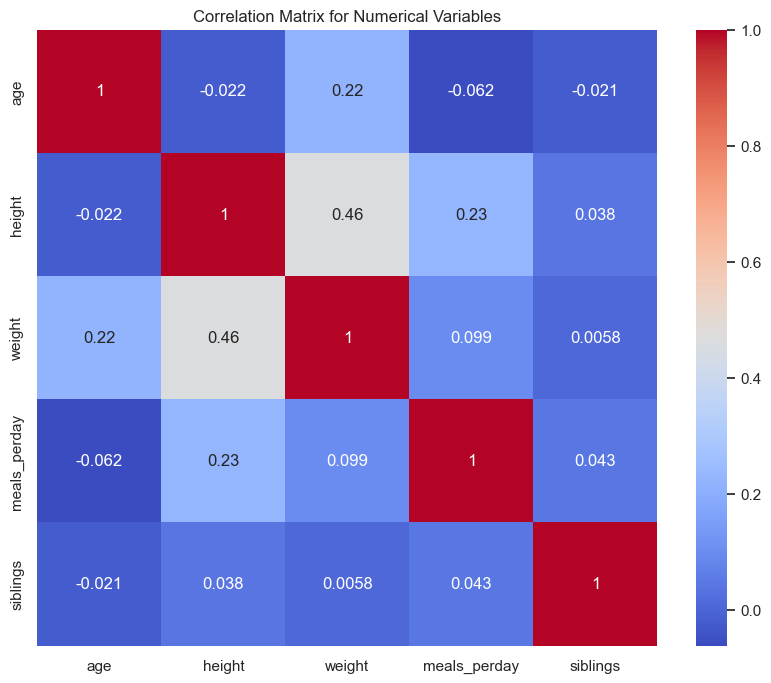

In [16]:
# Heatmap of correlation for numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(obesity_train_raw[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()


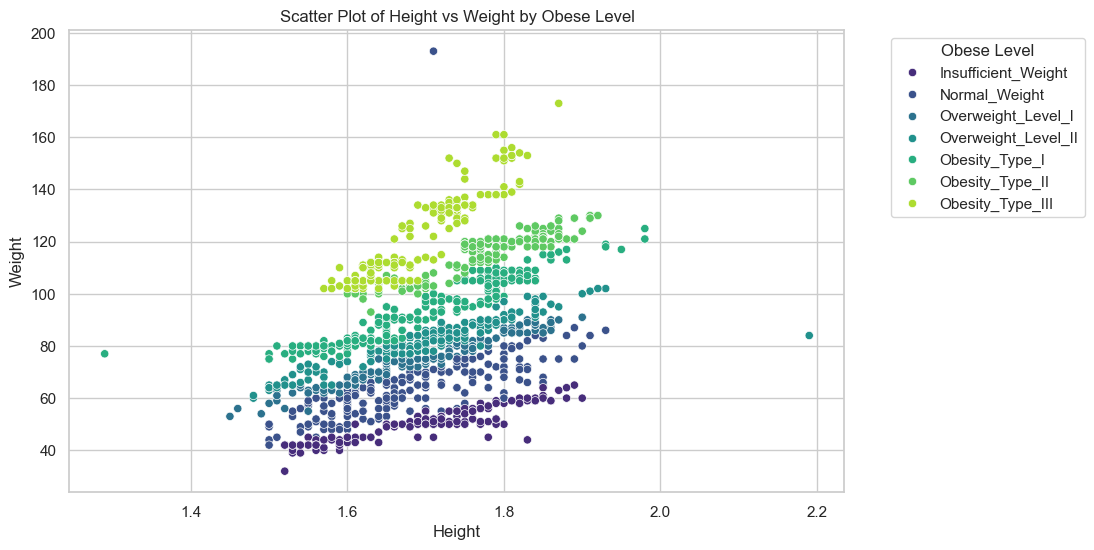

In [17]:
obesity_train_raw['obese_level'] = pd.Categorical(
    obesity_train_raw['obese_level'],
    categories=[
        'Insufficient_Weight',
        'Normal_Weight',
        'Overweight_Level_I',
        'Overweight_Level_II',
        'Obesity_Type_I',
        'Obesity_Type_II',
        'Obesity_Type_III'
    ],
    ordered=True
)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=obesity_train_raw, x='height', y='weight', hue='obese_level', palette='viridis')
plt.title('Scatter Plot of Height vs Weight by Obese Level')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(title='Obese Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

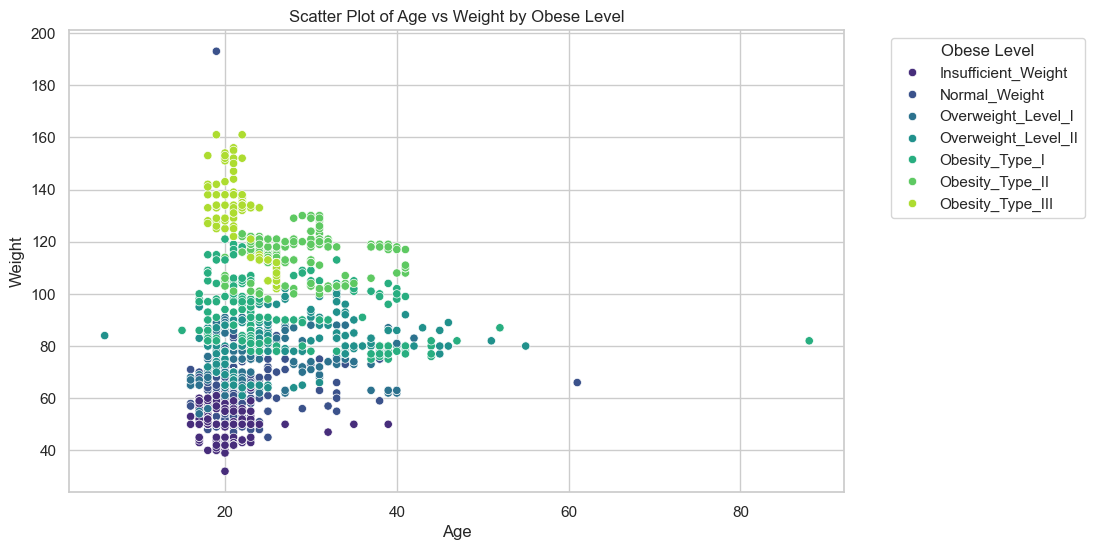

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=obesity_train_raw, x='age', y='weight', hue='obese_level', palette='viridis')
plt.title('Scatter Plot of Age vs Weight by Obese Level')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.legend(title='Obese Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_9504\1432021161.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=obesity_train_raw, x='obese_level', y='weight', palette='pastel')


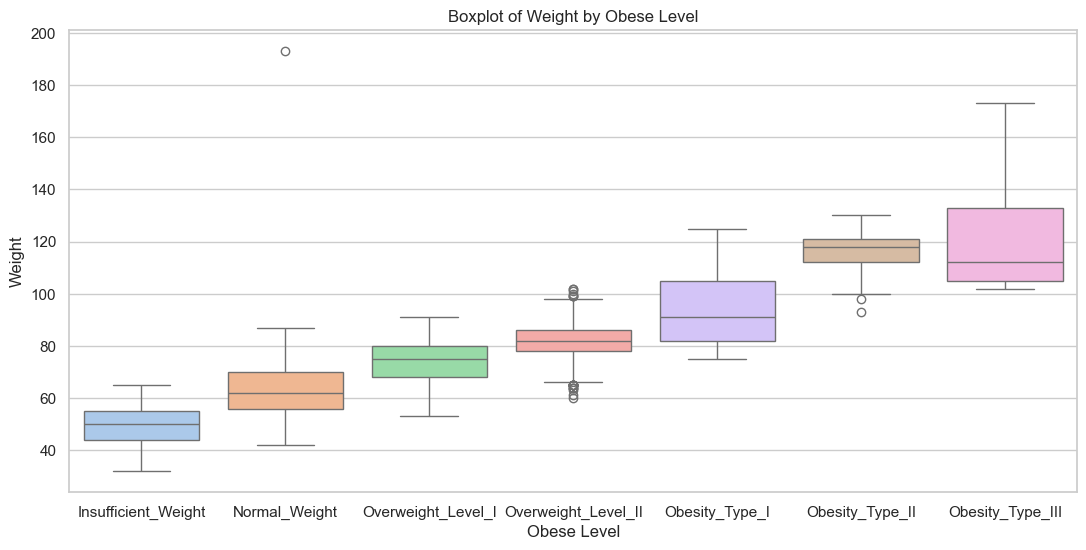

In [19]:
plt.figure(figsize=(13, 6))
sns.boxplot(data=obesity_train_raw, x='obese_level', y='weight', palette='pastel')
plt.title('Boxplot of Weight by Obese Level')
plt.xlabel('Obese Level')
plt.ylabel('Weight')
plt.show()

In [20]:
from scipy.stats import chi2_contingency

categorical_columns = obesity_train_raw.select_dtypes(include='object').columns
target_column = 'obese_level'
chi2_results = []
for col in categorical_columns:
    if col != target_column:
        contingency_table = pd.crosstab(obesity_train_raw[col], obesity_train_raw[target_column])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        chi2_results.append({'Variable': col, 'Chi2 Statistic': chi2, 'p-value': p})
chi2_results_df = pd.DataFrame(chi2_results)
chi2_results_df = chi2_results_df.sort_values(by='p-value') 
print(chi2_results_df)

                     Variable  Chi2 Statistic        p-value
3           eat_between_meals      602.723235  2.286336e-116
4                      gender      491.236927  6.490603e-103
6           parent_overweight      467.536896   8.239680e-98
11               veggies_freq      412.501632   8.507672e-81
0                alcohol_freq      246.495400   4.205366e-42
1                caloric_freq      182.130040   1.197222e-36
10             transportation      234.550350   1.864275e-36
7   physical_activity_perweek      206.297534   5.494615e-34
2              devices_perday      144.649421   6.881412e-25
12                water_daily       99.985735   5.603695e-16
5            monitor_calories       78.791072   6.348028e-15
9                       smoke       37.969702   1.138785e-06
8                      region        0.000000   1.000000e+00


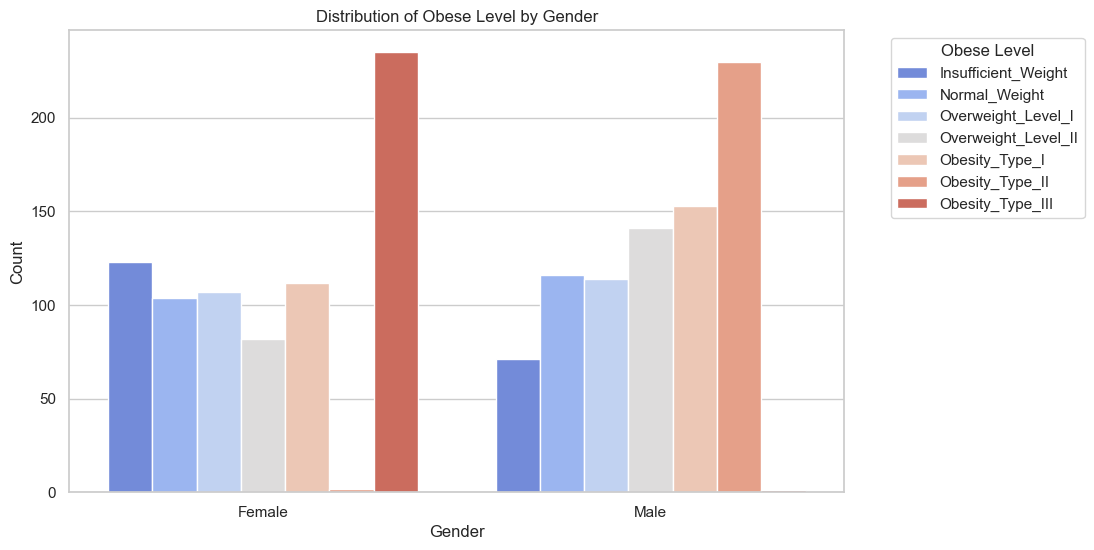

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=obesity_train_raw, x='gender', hue='obese_level', palette='coolwarm')
plt.title('Distribution of Obese Level by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Obese Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

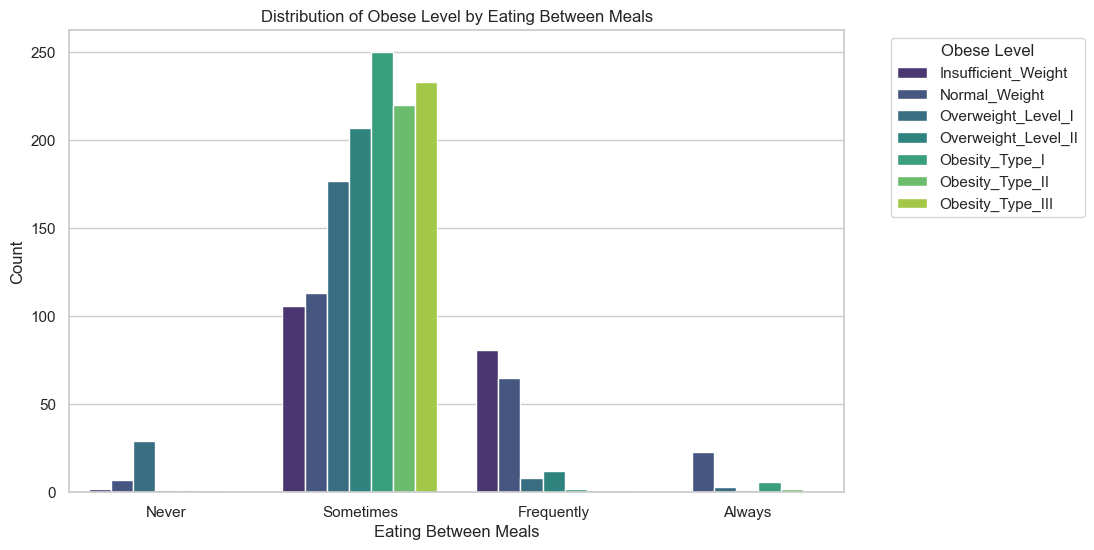

In [22]:
obesity_train_raw['eat_between_meals'] = pd.Categorical(
    obesity_train_raw['eat_between_meals'],
    categories=['Never', 'Sometimes', 'Frequently', 'Always'],
    ordered=True
)

plt.figure(figsize=(10, 6))
sns.countplot(data=obesity_train_raw, x='eat_between_meals', hue='obese_level', palette='viridis')
plt.title('Distribution of Obese Level by Eating Between Meals')
plt.xlabel('Eating Between Meals')
plt.ylabel('Count')
plt.legend(title='Obese Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

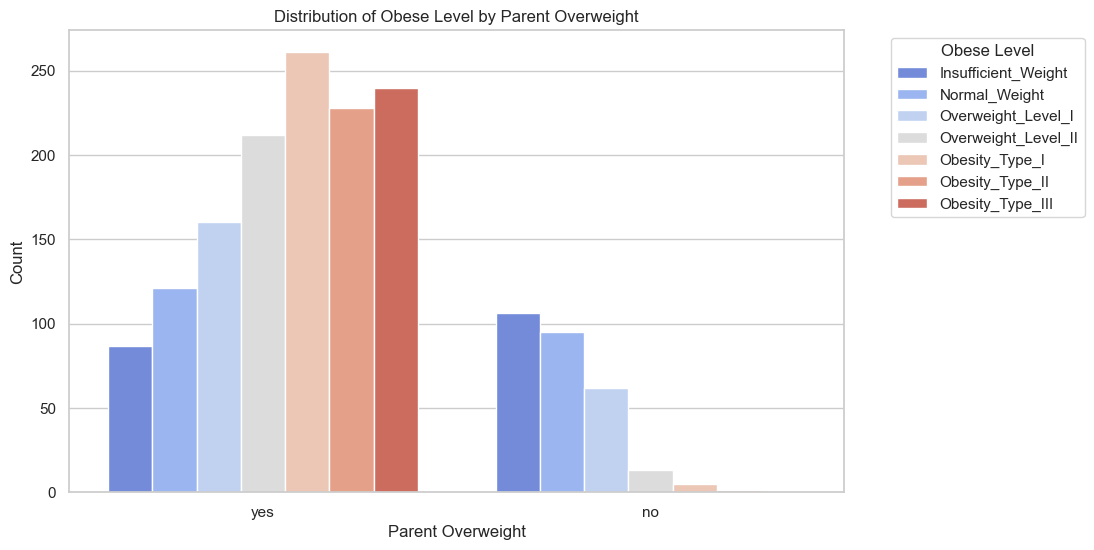

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=obesity_train_raw, x='parent_overweight', hue='obese_level', palette='coolwarm')
plt.title('Distribution of Obese Level by Parent Overweight')
plt.xlabel('Parent Overweight')
plt.ylabel('Count')
plt.legend(title='Obese Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

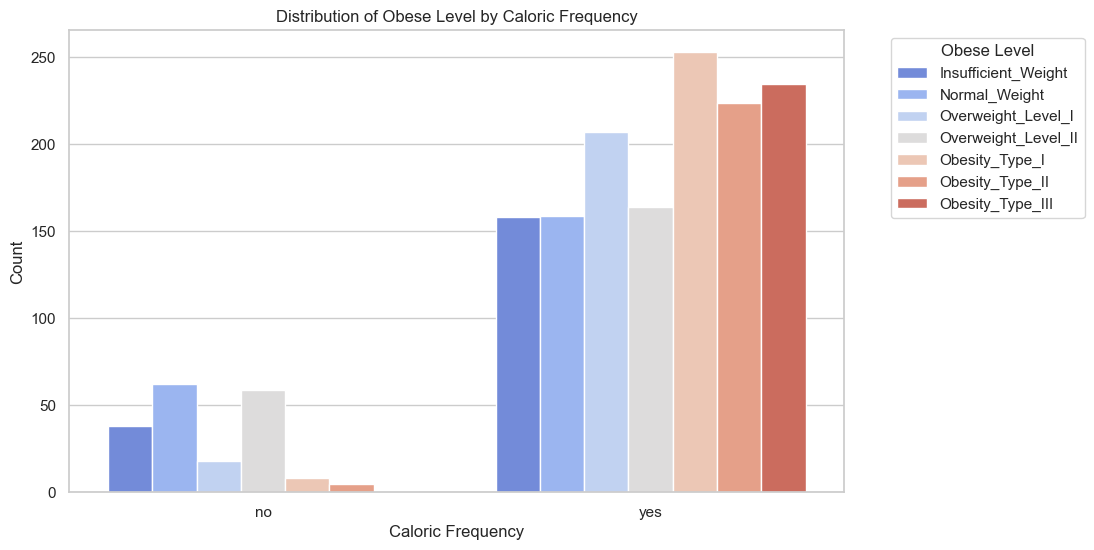

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=obesity_train_raw, x='caloric_freq', hue='obese_level', palette='coolwarm')
plt.title('Distribution of Obese Level by Caloric Frequency')
plt.xlabel('Caloric Frequency')
plt.ylabel('Count')
plt.legend(title='Obese Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


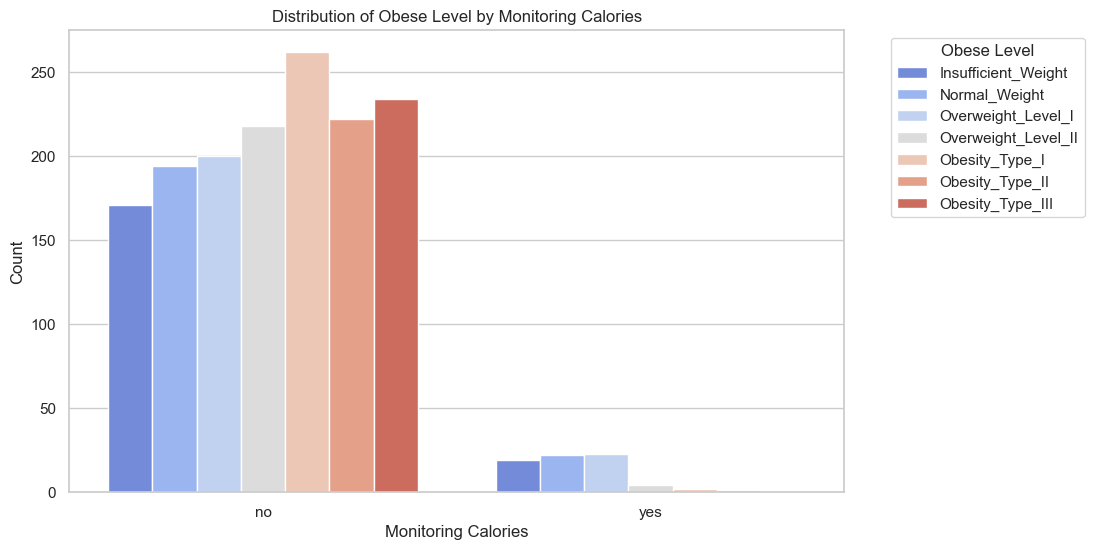

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=obesity_train_raw, x='monitor_calories', hue='obese_level', palette='coolwarm')
plt.title('Distribution of Obese Level by Monitoring Calories')
plt.xlabel('Monitoring Calories')
plt.ylabel('Count')
plt.legend(title='Obese Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

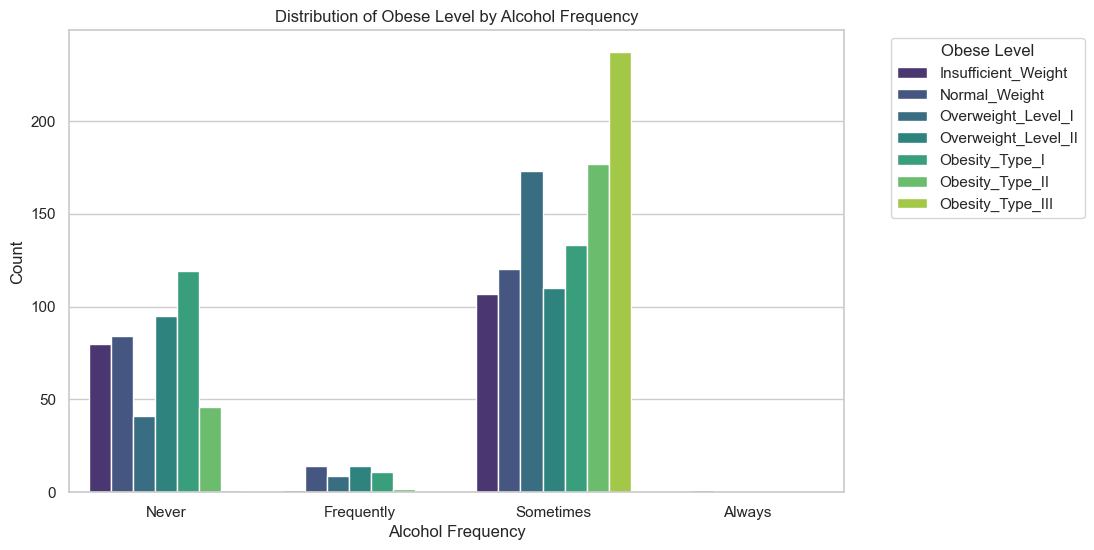

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=obesity_train_raw, x='alcohol_freq', hue='obese_level', palette='viridis')
plt.title('Distribution of Obese Level by Alcohol Frequency')
plt.xlabel('Alcohol Frequency')
plt.ylabel('Count')
plt.legend(title='Obese Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

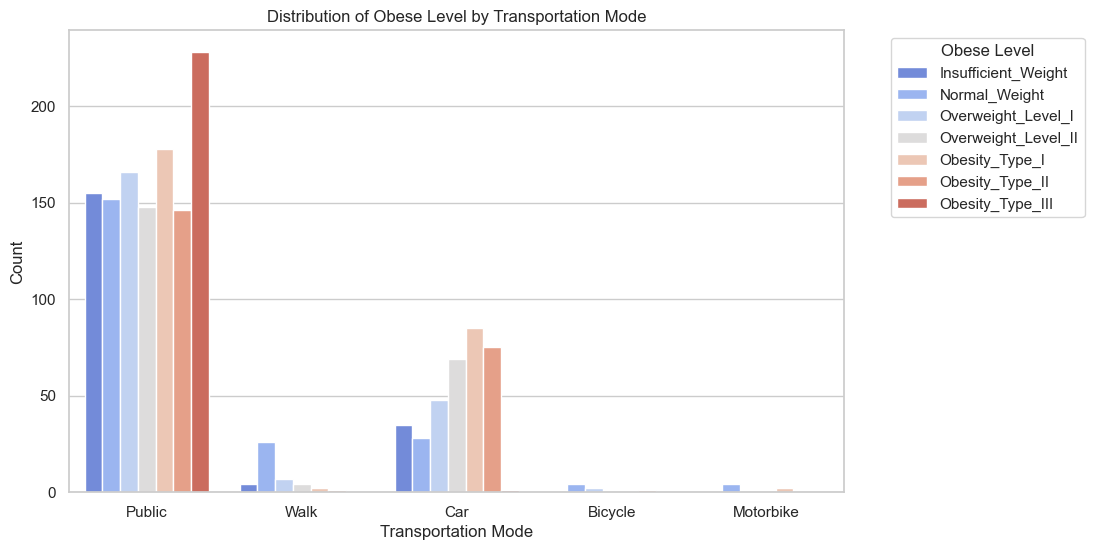

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=obesity_train_raw, x='transportation', hue='obese_level', palette='coolwarm')
plt.title('Distribution of Obese Level by Transportation Mode')
plt.xlabel('Transportation Mode')
plt.ylabel('Count')
plt.legend(title='Obese Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

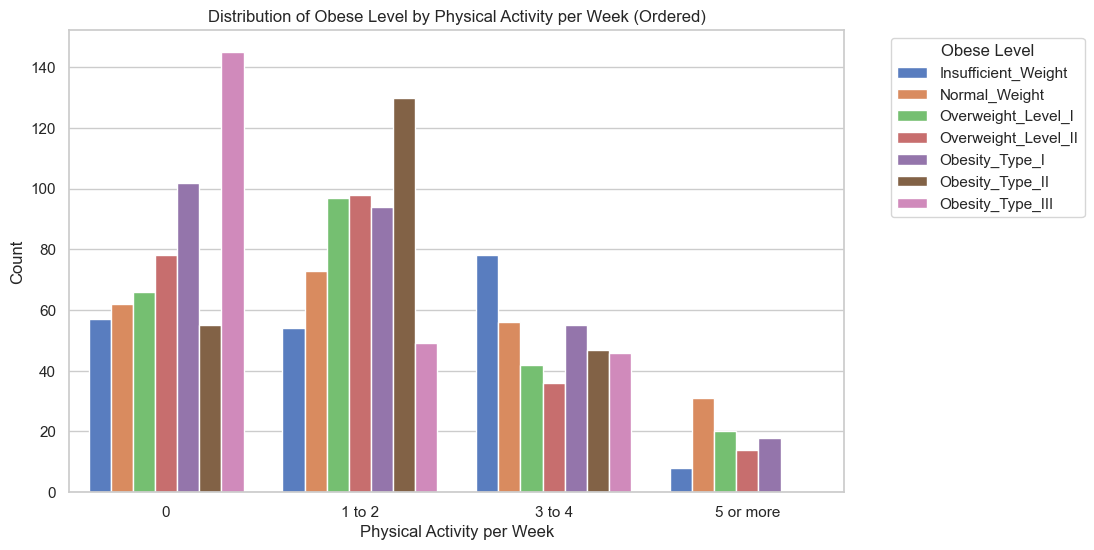

In [28]:
obesity_train_raw['physical_activity_perweek'] = pd.Categorical(
    obesity_train_raw['physical_activity_perweek'],
    categories=['0', '1 to 2', '3 to 4', '5 or more'],
    ordered=True
)

plt.figure(figsize=(10, 6))
sns.countplot(data=obesity_train_raw, x='physical_activity_perweek', hue='obese_level', palette='muted')
plt.title('Distribution of Obese Level by Physical Activity per Week (Ordered)')
plt.xlabel('Physical Activity per Week')
plt.ylabel('Count')
plt.legend(title='Obese Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()